In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/marcello/anaconda3/lib/python3.9/site-packages/numpy/_core/getlimits.py:545: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


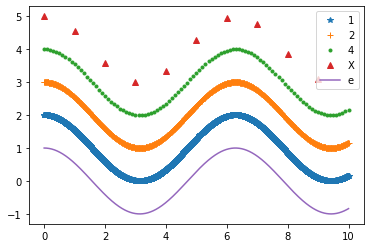

In [2]:
def f( t, y ):
    return - np.sin(t)


def RK1( f, t0, y0, h):
    
    k1 = f(t0,y0)
    return t0 + h, y0 + h * k1

def RK2( f, t0, y0, h):
    
    k1 = f(t0,y0)
    y1 = y0 + h / 2 * k1
    t1 = t0 + h / 2
    k2 = f(t1,y1)
    return t0 + h, y0 + h * k2

def RK4( f, t0, y0, h):
    
    k1 = f(t0,y0)
    y1 = y0 + h / 2 * k1
    t1 = t0 + h / 2
    k2 = f(t1,y1)
    y2 = y0 + h / 2 * k2
    t2 = t0 + h / 2
    k3 = f(t2,y2)
    y3 = y0 + h * k3
    t3 = t0 + h
    k4 = f(t3,y3)
    
    return t0 + h, y0 + h/6 * (k1+2*k2+2*k3+k4)

def RK( f, t0, y0, h, s,a,b,c):
    t = np.zeros(s)
    y = np.zeros(s)
    k = np.zeros(s)
    for i in range(s):
        y[i] = y0
        for j in range(i):
            y[i] += h * a[i,j] * k[j]
        t[i] = t0 + c[i] * h
        k[i] = f(t[i],y[i])
    t = t0 + h
    y = y0 + h * np.dot(b[:s],k)
    return t,y

t0,y0 = 0.,1.

# RK4
#s = 4
#a = np.zeros((s,s))
#a[0] = [0.0,0,0,0]
#a[1] = [0.5,0,0,0]
#a[2] = [0,0.5,0,0]
#a[3] = [0,0, 1.,0]
#b = np.array([1/6,1/3,1/3,1/6])
#c = np.array([0,1/2,1/2,1])

# RK3/8
s = 4
a = np.zeros((s,s))
a[0] = [             0,0,0,0]
a[1] = [1/3           ,0,0,0]
a[2] = [-1/3,1          ,0,0]
a[3] = [1   ,-1, 1        ,0]
b = np.array([1/8,3/8,3/8,1/8])
c = np.array([0,1/3,2/3,1])

# Euler
t1,y1 = t0,y0
tt1 = []
yy1 = []
h1 = 0.001
while t1 < 10:
    tt1.append(t1)
    yy1.append(y1)
    t1,y1 = RK1( f, t1, y1, h1)
tt1 = np.array(tt1)
yy1 = np.array(yy1)
ee1 = np.cos(tt1)

# Midpoint
t2,y2 = t0,y0
tt2 = []
yy2 = []
h2 = 0.01
while t2 < 10:
    tt2.append(t2)
    yy2.append(y2)
    t2,y2 = RK2( f, t2, y2, h2 )
tt2 = np.array(tt2)
yy2 = np.array(yy2)
ee2 = np.cos(tt2)
    
# Classic RK 4
t4,y4 = t0,y0
tt4 = []
yy4 = []
h4 = 0.1
while t4 < 10:
    tt4.append(t4)
    yy4.append(y4)
    t4,y4 = RK4( f, t4, y4, h4)
tt4 = np.array(tt4)
yy4 = np.array(yy4)
ee4 = np.cos(tt4)

# Any. Currently RK3/8
tx,yx = t0,y0
ttx = []
yyx = []
hx = 1
while tx < 10:
    ttx.append(tx)
    yyx.append(yx)
    tx,yx = RK( f, tx, yx, hx, s,a,b,c)   
ttx = np.array(ttx)
yyx = np.array(yyx)
eex = np.cos(ttx)


plt.plot(tt1,yy1+1,'*',label='1')
plt.plot(tt2,yy2+2,'+',label='2')
plt.plot(tt4,yy4+3,'.',label='4')
plt.plot(ttx,yyx+4,'^',label='X')
plt.plot(tt1,ee1+0,label='e')
plt.legend()

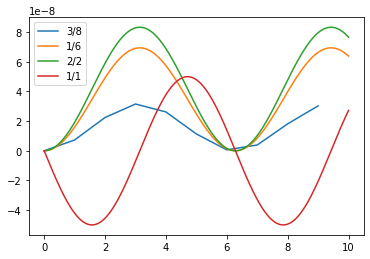

In [3]:
plt.plot( ttx, (eex - yyx)/10000, label='3/8')
plt.plot( tt4, (ee4 - yy4), label='1/6')
plt.plot( tt2, (ee2 - yy2)/100, label='2/2')
plt.plot( tt1, (ee1 - yy1)/10000, label='1/1')
plt.legend()